In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA

In [2]:
class DBCluster(object):
    def __init__(self, data, e, minpts):
        if not isinstance(data, pd.DataFrame):
            self.data = pd.DataFrame(data)
        else:
            self.data = data
        self.e = e
        self.minpts = minpts
        self.keyset = set() # 核心对象集合
        self.datadict = {} # 储存 Xi 的 小于等于 e 的点
        for i in range(len(self.data)):
            temp_set = set() # 储存 xi 的在距离小于等于 e 的点
            for j in range(len(self.data)):
                dif = self.data.iloc[i] - self.data.iloc[j]
                dis = pow(sum(pow(dif,2)), 0.5) # 计算距离
                if dis <= self.e:
                    temp_set.add(j)
            self.datadict[i] = temp_set
            if len(temp_set) >= self.minpts:
                self.keyset.add(i)

    def train(self):
        k = 0
        F = set(self.datadict.keys()) # 没访问过的样本
        total = F.copy()
        C = {}
        self.output = [0 for i in range(len(self.data))]
        while len(self.keyset) != 0 :
            F_old = F.copy() # 记录当前没访问过的样本
            x_list = random.sample(list(self.keyset), 1) # 从 Ω 中随机选一个样本列表
            F.discard(x_list[0])
            for x in x_list:
                if len(self.datadict[x]) >= self.minpts:
                    delta = F & self.datadict[x]
                    x_list.extend(list(delta))
                    F = F - delta
            k += 1
            C[k] = F_old - F
            self.keyset = self.keyset - C[k]
            print("=====================正在进行第{}轮训练==========================".format(k))
            for s in C[k]:
                self.output[s] = k
        self.noise = F
        self.rightdata = total - F
    
    def DB_plot(self):
        pca = PCA(n_components=2)   #降低成两维绘图 
        newData = pca.fit_transform(self.data)
        df = pd.DataFrame(newData)
        s1 = pd.Series(self.output, name="color")
        result = pd.concat([df, s1], axis=1)
        rc = list(self.rightdata)
        x = [n[1][0] for n in result.iloc[rc].iterrows()]  
        y = [n[1][1] for n in result.iloc[rc].iterrows()]
        color_right = [n[1]["color"] for n in result.iloc[rc].iterrows()]
        plt.scatter(x, y, c=color_right, s=50, marker='o')
        
        nc = list(self.noise)
        z = [n[1][0] for n in result.iloc[nc].iterrows()]  
        t = [n[1][1] for n in result.iloc[nc].iterrows()]
        color_noise = [n[1]["color"] for n in result.iloc[nc].iterrows()]
        plt.scatter(z, t, c=color_noise, s=50, marker='x')
        plt.title("DBSCAN")    
        plt.xlabel("x")  
        plt.ylabel("y")    
        plt.show()


In [3]:
random.seed(7) # 设置随机种子

In [4]:
data = pd.read_excel("cluster.xlsx") # 读取数据

In [5]:
dbcluster = DBCluster(data,0.11,5) # 实例化类

In [6]:
dbcluster.train() # 训练类

=====================正在进行第1轮训练==========================
=====================正在进行第2轮训练==========================
=====================正在进行第3轮训练==========================
=====================正在进行第4轮训练==========================


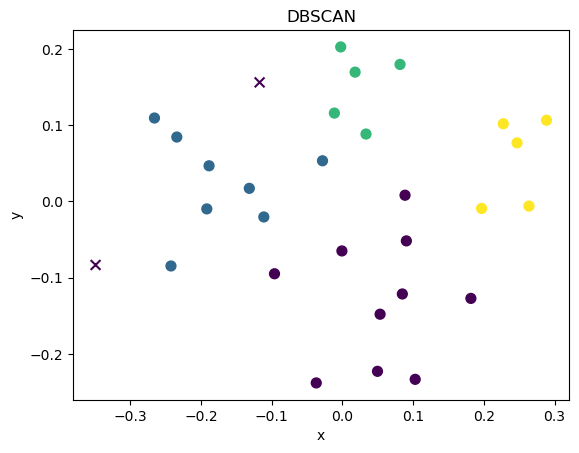

In [7]:
dbcluster.DB_plot() # 画图